<a href="https://colab.research.google.com/github/HungNguyen205/BaoCao_ThucHanhTriTueNhanTao_Ky05/blob/main/THTTNT_NguyenCaoManhhung_2001230284_BaoCao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align ="center"><font color ="purple">⛅Báo Cáo Thực Hành Trí Tuệ Nhân Tạo</font></h1>
---

**Họ và tên:** Nguyễn Cao Mạnh Hùng<br/>
**MSSV:** 2001230284


PHẦN 1: KHỞI TẠO (SETUP) <br/>
[Code]: Import thư viện

In [ ]:
import heapq  # Thư viện để triển khai hàng đợi ưu tiên (A*)
import random # Thư viện để tạo số ngẫu nhiên, hữu ích cho việc tạo trạng thái ban đầu ngẫu nhiên của Puzzle
import math   # Thư viện chứa các hàm toán học cơ bản
import copy   # Thư viện để tạo bản sao sâu của các đối tượng
import time   # Thư viện để đo thời gian thực hiện của thuật toán
import numpy as np # Thư viện cho các phép toán số học hiệu quả trên mảng và ma trận
import networkx as nx # Thư viện để tạo và thao tác với đồ thị
import matplotlib.pyplot as plt # Thư viện để vẽ đồ thị và biểu đồ
from matplotlib import colors # Module hỗ trợ xử lý màu sắc trong matplotlib
from typing import List, Tuple, Dict, Set, Optional # Module hỗ trợ định kiểu dữ liệu để mã dễ đọc và bảo trì hơn
from IPython.display import clear_output # Thư viện để xóa output, hỗ trợ animation
import matplotlib.colors as mcolors # Để tạo ra các bảng màu tùy chỉnh
import matplotlib.patches as mpatches # Để vẽ các miếng vá màu (như các ô vuông màu trong chú thích)
from matplotlib.lines import Line2D # Để vẽ các đường thẳng hoặc biểu tượng trong phần chú thích
import random #Thư viện hỗ trợ sinh ngẫu nhiên số
from IPython.display import clear_output # Xóa nội dung output cũ trên Jupyter Notebook/Google Colab

# Cấu hình hiển thị Matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['font.size'] = 12

PHẦN 2: MODULE A* - BÀI TOÁN TÌM ĐƯỜNG ĐI TRONG MÊ CUNG


## 1. Giới thiệu bài toán
Bài toán tìm đường đi trong mê cung (Maze Pathfinding) là một ví dụ điển hình của bài toán tìm kiếm trên đồ thị.
* **Không gian trạng thái:** Một lưới $N \times N$ các ô vuông.
* **Trạng thái:** Tọa độ $(x, y)$ của ô hiện tại.
* **Hành động:** Di chuyển sang các ô lân cận (Lên, Xuống, Trái, Phải) nếu không bị chặn bởi tường.
* **Mục tiêu:** Tìm lộ trình ngắn nhất từ điểm bắt đầu (**Start**) đến điểm đích (**Goal**).

## 2. Cơ sở lý thuyết thuật toán A*
**A* (A-Star)** là giải thuật tìm kiếm có thông tin (Informed Search), kết hợp ưu điểm của *Dijkstra* (tìm đường ngắn nhất thực tế) và *Greedy Best-First Search* (hướng đích nhanh nhất).

### 2.1. Hàm đánh giá (Evaluation Function)
A* lựa chọn nút tiếp theo để duyệt dựa trên hàm chi phí:
$$f(n) = g(n) + h(n)$$

Trong đó:
* $g(n)$: **Chi phí thực tế** từ điểm bắt đầu ($Start$) đến nút hiện tại $n$. Trong mê cung lưới, mỗi bước đi thường có chi phí là 1.
* $h(n)$: **Chi phí ước lượng (Heuristic)** từ nút hiện tại $n$ đến đích ($Goal$).
* $f(n)$: Tổng chi phí ước lượng của đường đi qua nút $n$.

### 2.2. Hàm Heuristic trong không gian lưới
Để đảm bảo A* tìm được đường đi tối ưu (Optimal), hàm $h(n)$ phải là hàm **chấp nhận được (Admissible)**, nghĩa là không bao giờ đánh giá cao hơn chi phí thực tế.
Với bài toán mê cung chỉ cho phép đi 4 hướng (không đi chéo), ta sử dụng **Khoảng cách Manhattan**:

$$h(n) = |x_{current} - x_{goal}| + |y_{current} - y_{goal}|$$

### 2.3. Các bước thực hiện
1.  **Khởi tạo:**
    * `Open List` (Hàng đợi ưu tiên): Chứa $Start$ với $f(Start) = h(Start)$.
    * `Closed List` (Tập đã duyệt): Rỗng.
2.  **Lặp:** Khi `Open List` không rỗng:
    * Lấy nút $n$ có giá trị $f(n)$ nhỏ nhất từ `Open List`.
    * Nếu $n$ là $Goal$: **Dừng và truy vết đường đi.**
    * Thêm $n$ vào `Closed List`.
    * Xét các nút lân cận $m$ của $n$:
        * Nếu $m$ là tường hoặc đã trong `Closed List`: Bỏ qua.
        * Tính $g(m) = g(n) + 1$.
        * Nếu $m$ chưa trong `Open List` hoặc $g(m)$ mới nhỏ hơn $g(m)$ cũ:
            * Cập nhật $g(m)$, $h(m)$, $f(m)$.
            * Đặt cha của $m$ là $n$ (để truy vết).
            * Thêm $m$ vào `Open List`.
3.  **Kết thúc:** Nếu `Open List` rỗng mà chưa tới đích $\rightarrow$ Không có đường đi.



Helper: Môi trường & Hiển thị <br/>
Mô hình hóa dữ liệu (Model): Định nghĩa cấu trúc Node (đỉnh) và Maze (bản đồ).<br/>
Giao diện (View): Class MazeVisualizer chịu trách nhiệm vẽ bản đồ ra màn hình.

In [ ]:
class Node:
    """Đại diện cho một ô."""
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __lt__(self, other):
        # Ưu tiên F nhỏ, nếu bằng thì ưu tiên H nhỏ
        return self.f < other.f or (self.f == other.f and self.h < other.h)

    def __repr__(self):
        return f"{self.position}"

class Maze:
    """Quản lý dữ liệu mê cung."""
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size)) # 0: Đường, 1: Tường
        self.start = None
        self.goal = None

    def generate_obstacles(self, prob):
        self.grid = np.zeros((self.size, self.size))
        for r in range(self.size):
            for c in range(self.size):
                if random.random() < prob:
                    self.grid[r][c] = 1

    def set_points(self, start, goal):
        self.start = start
        self.goal = goal
        self.grid[start] = 0
        self.grid[goal] = 0

    def is_valid(self, pos):
        r, c = pos
        return (0 <= r < self.size) and (0 <= c < self.size) and (self.grid[r][c] == 0)

class MazeVisualizer:
    """Class vẽ Mê cung, Bảng tính và Chú thích."""

    @staticmethod
    def show_step_with_legend(step, maze, current_node, open_list, closed_set, neighbors_info, path=None):
        """
        Vẽ đầy đủ: Mê cung, Lưới, Chú thích màu, Bảng Heuristic.
        """
        # 1. SETUP MÀU SẮC
        # 0:Trắng, 1:Đen, 2:Xám, 3:Cam, 4:Tím, 5:Xanh
        color_grid = maze.grid.copy()

        for r, c in closed_set:
            color_grid[r][c] = 2 # Closed
        for node in open_list:
            color_grid[node.position[0]][node.position[1]] = 3 # Open
        if current_node:
            color_grid[current_node.position[0]][current_node.position[1]] = 4 # Current

        # Định nghĩa bảng màu
        colors = ['white', 'black', '#d3d3d3', '#ffa500', '#800080', '#0000ff']
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 1, 2, 3, 4, 5, 6]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # 2. KHỞI TẠO KHUNG HÌNH (SUBPLOTS)
        fig, (ax_map, ax_table) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1.2, 0.8]})

        # --- A. VẼ MÊ CUNG (TRÁI) ---
        ax_map.imshow(color_grid, cmap=cmap, norm=norm)

        # Kẻ lưới và đánh số
        ax_map.set_xticks(np.arange(-0.5, maze.size, 1), minor=True)
        ax_map.set_yticks(np.arange(-0.5, maze.size, 1), minor=True)
        ax_map.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
        ax_map.xaxis.tick_top() # Số cột nằm trên

        # Vẽ Start/Goal
        ax_map.scatter(maze.start[1], maze.start[0], c='lime', s=180, edgecolors='k', zorder=10, label='Start')
        ax_map.scatter(maze.goal[1], maze.goal[0], c='red', marker='*', s=250, edgecolors='k', zorder=10, label='Goal')

        if path:
            ys, xs = zip(*path)
            ax_map.plot(xs, ys, c='blue', linewidth=4, zorder=5)
            ax_map.set_title(f"BƯỚC {step}: HOÀN THÀNH (Chi phí {len(path)})", fontweight='bold', pad=15)
        else:
            title_txt = f"Start" if current_node is None else f"{current_node.position}"
            ax_map.set_title(f"BƯỚC {step}: Đang xét {title_txt}", fontweight='bold', pad=15)

        # --- B. TẠO CHÚ THÍCH ---
        # Tạo các miếng vá màu (Patches) giả lập cho legend
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='lime', markersize=10, markeredgecolor='k', label='Start'),
            Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=13, markeredgecolor='k', label='Goal'),
            mpatches.Patch(color='white', label='Đường đi', edgecolor='gray'),
            mpatches.Patch(color='black', label='Tường'),
            mpatches.Patch(color='#d3d3d3', label='Đã duyệt (Closed)'),
            mpatches.Patch(color='#ffa500', label='Đang chờ (Open)'),
            mpatches.Patch(color='#800080', label='Đang xét (Current)'),
            mpatches.Patch(color='#0000ff', label='Đường đi kết quả')
        ]

        # Đặt chú thích bên dưới bản đồ
        ax_map.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05),
                      fancybox=True, shadow=True, ncol=4, fontsize=9)

        # --- C. VẼ BẢNG TÍNH (PHẢI) ---
        ax_table.axis('off')
        ax_table.set_title("BẢNG TÍNH HEURISTIC (F = G + H)", fontweight='bold', pad=10)

        table_data = []
        if current_node:
            table_data.append([str(current_node.position), current_node.g, f"{current_node.h:.1f}", f"{current_node.f:.1f}", "Current"])

        for n_info in neighbors_info:
            # n_info: (pos, g, h, f, status)
            table_data.append([str(n_info[0]), n_info[1], f"{n_info[2]:.1f}", f"{n_info[3]:.1f}", n_info[4]])

        col_labels = ["Tọa độ", "G (Thực)", "H (Ước lượng)", "F (Tổng)", "Ghi chú"]

        if table_data:
            # Màu nền cho bảng để dễ nhìn
            cell_colors = []
            for i in range(len(table_data)):
                if i == 0 and current_node: cell_colors.append(["#f0f0f0"] * 5) # Dòng đầu xám nhạt
                else: cell_colors.append(["#ffffff"] * 5)

            table = ax_table.table(cellText=table_data, colLabels=col_labels,
                                   cellColours=cell_colors,
                                   loc='center', cellLoc='center', bbox=[0, 0, 1, 1])
            table.auto_set_font_size(False)
            table.set_fontsize(10)
        else:
            ax_table.text(0.5, 0.5, "Đang khởi tạo...", ha='center', style='italic')

        plt.tight_layout()
        plt.show()

Core: Thuật toán A*
Trí tuệ (Logic): Chứa thuật toán A*, hàm heuristic (Manhattan). Nhận đầu vào là Maze và trả về Path.

In [ ]:
class AStarSolver:
    def __init__(self, maze):
        self.maze = maze

    def _heuristic(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def solve_process(self):
        """
        Generator: Trả về dữ liệu chi tiết để vẽ bảng.
        """
        start_node = Node(self.maze.start)
        goal_node = Node(self.maze.goal)
        start_node.h = self._heuristic(start_node.position, goal_node.position)
        start_node.f = start_node.g + start_node.h

        open_list = []
        heapq.heappush(open_list, start_node)

        closed_set = set()
        g_score = {self.maze.start: 0}

        step_count = 0

        while open_list:
            step_count += 1

            # 1. Lấy node tốt nhất
            current = heapq.heappop(open_list)

            # Danh sách lưu thông tin các hàng xóm để hiển thị bảng
            neighbors_info = []

            # 2. Kiểm tra đích
            if current.position == goal_node.position:
                path = self._reconstruct_path(current)
                # Yield lần cuối
                yield step_count, current, open_list, closed_set, [], path
                return

            closed_set.add(current.position)

            # 3. Duyệt lân cận
            # Duyệt theo thứ tự: Lên, Trái, Xuống, Phải
            for d in [(-1, 0), (0, -1), (1, 0), (0, 1)]:
                neighbor_pos = (current.position[0] + d[0], current.position[1] + d[1])

                if not self.maze.is_valid(neighbor_pos):
                    continue

                if neighbor_pos in closed_set:
                    continue

                new_g = current.g + 1
                h_val = self._heuristic(neighbor_pos, goal_node.position)
                f_val = new_g + h_val

                status = "Mới"

                # Nếu đường đi mới tốt hơn hoặc chưa từng đến
                if neighbor_pos not in g_score or new_g < g_score[neighbor_pos]:
                    if neighbor_pos in g_score: status = "Cập nhật tốt hơn"

                    g_score[neighbor_pos] = new_g
                    neighbor = Node(neighbor_pos, current)
                    neighbor.g = new_g
                    neighbor.h = h_val
                    neighbor.f = f_val

                    heapq.heappush(open_list, neighbor)
                    neighbors_info.append((neighbor_pos, new_g, h_val, f_val, status))

            # YIELD: Trả về dữ liệu để vẽ
            yield step_count, current, open_list, closed_set, neighbors_info, None

        # Không tìm thấy đường
        yield step_count, None, [], closed_set, [], None

    def _reconstruct_path(self, node):
        path = []
        while node:
            path.append(node.position)
            node = node.parent
        return path[::-1]

Code: Main(A*)

In [ ]:
def run_astar():
    print("=== A* ===")

    # 1. Nhập cấu hình (1 dòng duy nhất)
    print("Mẹo: Nhập '8 30' để tạo bản đồ 8x8, mật độ 30%")
    try:
        raw_cfg = input(">> Nhập [Size] [Mật độ %]: ").split()
        if len(raw_cfg) < 2: n, prob = 8, 0.3 # Mặc định
        else: n, prob = int(raw_cfg[0]), int(raw_cfg[1])/100.0
    except:
        n, prob = 8, 0.3
        print("Lỗi nhập liệu -> Dùng mặc định 8x8, 30%")

    # Tạo & Hiển thị map trống
    maze = Maze(n)
    maze.generate_obstacles(prob)

    print(f"\n[MAP {n}x{n}]")
    plt.figure(figsize=(4, 4))
    plt.imshow(maze.grid, cmap='binary')
    plt.grid(color='gray', linestyle='-', linewidth=0.5)
    plt.title("Nhìn bản đồ này để chọn tọa độ")
    plt.show()

    # 2. Nhập tọa độ Start/Goal (1 dòng cho Start, 1 dòng cho Goal)
    while True:
        try:
            print("Nhập tọa độ dạng: Hàng Cột (VD: 0 0)")
            s_in = input(">> Start: ").split()
            g_in = input(">> Goal : ").split()

            start = (int(s_in[0]), int(s_in[1]))
            goal = (int(g_in[0]), int(g_in[1]))

            if maze.is_valid(start) and maze.is_valid(goal):
                break
            else:
                print("Tọa độ trùng Tường hoặc ngoài MAP! Nhập lại.")
        except:
            print("Sai định dạng số!")

    maze.set_points(start, goal)

    # 3. Chạy thuật toán
    solver = AStarSolver(maze)
    print("\n" + "="*50)
    print(f"BẮT ĐẦU DUYỆT TỪ {start} --> {goal}")
    print("="*50)

    found = False
    for step, curr, opens, closeds, neighbors, path in solver.solve_process():
        # Gọi hàm hiển thị
        MazeVisualizer.show_step_with_legend(step, maze, curr, opens, closeds, neighbors, path)

        if path:
            found = True
            print(f"\nĐÃ TÌM THẤY ĐÍCH SAU {step} BƯỚC!")
            break
        if curr is None and not path:
            print("\nKHÔNG TÌM THẤY ĐƯỜNG ĐI!")
            break

# Chạy chương trình
run_astar()

=== A* ===
Mẹo: Nhập '8 30' để tạo bản đồ 8x8, mật độ 30%
>> Nhập [Size] [Mật độ %]: 8 30


NameError: name 'Maze' is not defined

## 1. Thuật toán Minimax
##1.1. Nguyên lý hoạt động
<div style="text-align: justify;">
&emsp;&emsp;Minimax là giải thuật đệ quy cơ bản nhất được sử dụng trong lý thuyết trò chơi và trí tuệ nhân tạo để xác định nước đi tốt nhất cho một người chơi, với giả định rằng đối thủ cũng đang chơi một cách tối ưu để bảo vệ lợi ích của họ.<br>
&emsp;&emsp;Thuật toán dựa trên tư duy chiến lược "nhìn xa trông rộng": để quyết định nước đi hiện tại, ta phải dự đoán các phản ứng của đối thủ, rồi lại dự đoán phản ứng của mình trước nước đi đó của đối thủ, cứ thế tiếp diễn cho đến khi ván cờ kết thúc hoặc đạt đến giới hạn tính toán.<br>
&emsp;&emsp;Trong mô hình này, hai người chơi được gán tên là MAX và MIN:<br>
&emsp;&emsp;<b>- MAX (Máy tính):</b> Đại diện cho người chơi đang cần tìm nước đi. Mục tiêu của MAX là chọn hành động dẫn đến trạng thái có giá trị hàm lợi ích cao nhất (Maximize).<br>
&emsp;&emsp;<b>- MIN (Đối thủ):</b> Đại diện cho đối phương. Mục tiêu của MIN là chọn hành động dẫn đến trạng thái có giá trị hàm lợi ích thấp nhất (Minimize), nhằm dìm điểm số của MAX xuống mức thấp nhất có thể. </div>

###1.2. Công thức toán học
<div style="text-align: justify;">
&emsp;&emsp;Giá trị Minimax của một trạng thái (node) $s$ bất kỳ được xác định bằng công thức đệ quy sau:$$Minimax(s) =
\begin{cases}
Utility(s) & \text{nếu } s \text{ là trạng thái kết thúc (Terminal state)} \\
\max\_{a \in Actions(s)} Minimax(Result(s, a)) & \text{nếu } Player(s) = MAX \\
\min\_{a \in Actions(s)} Minimax(Result(s, a)) & \text{nếu } Player(s) = MIN
\end{cases}$$
&emsp;&emsp;<b>Trong đó:</b><br>
&emsp;&emsp;+ Nếu $s$ là lá, giá trị Minimax chính là điểm số của trạng thái đó.<br>
&emsp;&emsp;+ Nếu đến lượt MAX, giá trị của $s$ bằng giá trị lớn nhất trong số các giá trị của các nút con (MAX sẽ chọn đi nước tốt nhất cho mình).<br>
&emsp;&emsp;+ Nếu đến lượt MIN, giá trị của $s$ bằng giá trị nhỏ nhất trong số các giá trị của các nút con (MIN sẽ chọn đi nước tệ nhất cho MAX).</div>

###1.3. Quy trình thực hiện
<div style="text-align: justify;">
&emsp;&emsp;Thuật toán Minimax hoạt động theo cơ chế Tìm kiếm theo chiều sâu (Depth-First Search - DFS) và Lan truyền ngược (Back-propagation). Quy trình cụ thể gồm 4 bước:<br>
&emsp;&emsp;<b>1. Sinh cây trò chơi:</b> Từ trạng thái hiện tại, thuật toán sinh ra các trạng thái con cho đến độ sâu quy định hoặc đến trạng thái kết thúc.<br>
&emsp;&emsp;<b>2. Đánh giá tại lá:</b> Tại các nút lá (leaf nodes), áp dụng hàm lợi ích (hoặc hàm Heuristic) để tính điểm số cho trạng thái đó.<br>
&emsp;&emsp;<b>3. Lan truyền ngược (Backtracking):</b> Giá trị từ các nút lá được đẩy ngược lên các nút cha theo quy tắc:<br>
&emsp;&emsp;&emsp;+ Tại tầng của MIN, nút cha nhận giá trị nhỏ nhất của các con.<br>
&emsp;&emsp;&emsp;+ Tại tầng của MAX, nút cha nhận giá trị lớn nhất của các con.<br>
&emsp;&emsp;<b>4. Ra quyết định:</b> Khi giá trị được lan truyền ngược về đến nút gốc (Root), MAX sẽ chọn nước đi dẫn đến nút con có giá trị cao nhất.</div>

HELPER (BÀN CỜ & ĐIỀU KIỆN THẮNG)

In [ ]:
# Hằng số
EMPTY = 0
PLAYER_X = 1 # Người chơi
PLAYER_O = 2 # AI

class CaroBoard:
    def __init__(self, size_n, size_m=None):
        """
        Khởi tạo bàn cờ n x n.

        Args:
            n (int): Kích thước cạnh của bàn cờ (mặc định = 10).
        """
        self.rows = size_n
        self.cols = size_m if size_m else size_n
        self.grid = np.zeros((self.rows, self.cols), dtype=int)

        # Luật thắng tự động
        min_dim = min(self.rows, self.cols)
        self.win_k = 3 if min_dim <= 3 else (4 if min_dim <= 5 else 5)
        print(f"--> Tạo bàn {self.rows}x{self.cols}. Luật thắng: Nối {self.win_k}.")

    def is_valid(self, r, c):
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == EMPTY

    def make_move(self, r, c, player):
        if self.is_valid(r, c):
            self.grid[r][c] = player
            return True
        return False

    def check_winner(self):
        """
        Kiểm tra xem người chơi chỉ định đã thắng chưa (có 5 quân liên tiếp).

        Args:
            player (int): Giá trị đại diện người chơi (1 hoặc -1).

        Returns:
            bool: True nếu người chơi này đã thắng, ngược lại False.
        """
        k = self.win_k
        dirs = [(0, 1), (1, 0), (1, 1), (1, -1)]
        for r in range(self.rows):
            for c in range(self.cols):
                p = self.grid[r][c]
                if p == EMPTY: continue
                for dr, dc in dirs:
                    if (0 <= r + (k-1)*dr < self.rows) and (0 <= c + (k-1)*dc < self.cols):
                        if all(self.grid[r + i*dr][c + i*dc] == p for i in range(k)):
                            return p
        return 0

    def is_full(self):
        """
        Kiểm tra bàn cờ đã đầy chưa (Hòa).

        Returns:
            bool: True nếu không còn ô trống, False nếu còn.
        """
        return np.all(self.grid != EMPTY)

    def get_nearby_empty_cells(self, radius=1):
        """
        Tìm các ô trống lân cận các ô đã đánh (phạm vi 2 ô).
        Giúp thuật toán Minimax chỉ tập trung vào các khu vực có ý nghĩa thay vì duyệt toàn bộ bàn cờ.

        Returns:
            list[tuple]: Danh sách tọa độ (row, col) các ô trống đáng quan tâm.
        """
        indices = np.argwhere(self.grid != EMPTY)
        if len(indices) == 0: return [(self.rows//2, self.cols//2)]

        candidates = set()
        for r, c in indices:
            for dr in range(-radius, radius+1):
                for dc in range(-radius, radius+1):
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < self.rows and 0 <= nc < self.cols and self.grid[nr][nc] == EMPTY:
                        candidates.add((nr, nc))
        return list(candidates)

class CaroVisualizer:
    @staticmethod
    def draw(board, last_move=None, ai_scores=None):
        clear_output(wait=True)
        # Tự động chỉnh size ảnh
        fig_w = max(5, board.cols * 0.6)
        fig_h = max(5, board.rows * 0.6)
        fig, ax = plt.subplots(figsize=(fig_w, fig_h))

        # 1. Cấu hình trục để ô vuông chẵn
        ax.set_xlim(0, board.cols)
        ax.set_ylim(board.rows, 0) # Đảo trục Y
        ax.set_aspect('equal') # Bắt buộc ô phải vuông

        # 2. Vẽ lưới (Grid) thủ công để đảm bảo đẹp
        # Vẽ các đường ngang
        for r in range(board.rows + 1):
            ax.axhline(r, color='black', linewidth=1)
        # Vẽ các đường dọc
        for c in range(board.cols + 1):
            ax.axvline(c, color='black', linewidth=1)

        # Tắt trục mặc định
        ax.axis('on')
        ax.set_xticks(np.arange(0.5, board.cols, 1))
        ax.set_yticks(np.arange(0.5, board.rows, 1))

        # Đánh số tọa độ ở giữa ô (hoặc dùng tick labels)
        ax.set_xticklabels(range(board.cols))
        ax.set_yticklabels(range(board.rows))
        ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False) # Số cột hiện ở trên

        # 3. Vẽ X và O
        for r in range(board.rows):
            for c in range(board.cols):
                val = board.grid[r][c]
                if val == PLAYER_X:
                    # Vẽ X
                    ax.plot(c + 0.5, r + 0.5, marker='x', markersize=20,
                            color='blue', markeredgewidth=3)
                elif val == PLAYER_O:
                    # Vẽ O
                    ax.plot(c + 0.5, r + 0.5, marker='o', markersize=20,
                            markeredgecolor='red', markerfacecolor='none', markeredgewidth=3)

        # 4. Highlight nước vừa đi (Màu vàng nhạt)
        if last_move:
            lr, lc = last_move
            rect = plt.Rectangle((lc, lr), 1, 1, color='yellow', alpha=0.3, zorder=0)
            ax.add_patch(rect)

        # 5. Heatmap điểm số
        if ai_scores:
            for (r, c), score in ai_scores.items():
                s_txt = f"{int(score/1000)}k" if abs(score)>=1000 else f"{int(score)}"
                ax.text(c+0.5, r+0.85, s_txt, ha='center', va='center',
                        fontsize=8, color='purple', alpha=0.8)

        plt.title(f"Luật thắng: {board.win_k} ô liên tiếp", pad=20)
        plt.tight_layout()
        plt.show()

CORE (TÍNH TOÁN & GIẢI THÍCH)

In [ ]:
class CaroAI:
    """
    Lớp AI (Solver) sử dụng thuật toán Minimax kết hợp cắt tỉa Alpha-Beta.
    """
    def __init__(self, depth=2):
        """
        Khởi tạo AI.

        Args:
            depth (int): Độ sâu tối đa của cây tìm kiếm (mặc định = 3).
        """
        self.depth = depth
        self.max_player = PLAYER_O
        self.min_player = PLAYER_X

    def evaluate_window(self, window, player, win_k):
        score = 0
        opp = self.min_player if player == self.max_player else self.max_player

        my_cnt = np.count_nonzero(window == player)
        opp_cnt = np.count_nonzero(window == opp)

        if my_cnt > 0 and opp_cnt > 0: return 0

        if my_cnt == win_k: score += 1000000
        elif my_cnt == win_k - 1: score += 50000
        elif my_cnt == win_k - 2: score += 1000
        elif my_cnt == win_k - 3: score += 100
        return score

    def evaluate_board(self, board):
        winner = board.check_winner()
        if winner == self.max_player: return 100000000
        if winner == self.min_player: return -100000000

        score = 0
        k = board.win_k
        grid = board.grid

        # Ngang
        for r in range(board.rows):
            for c in range(board.cols - k + 1):
                w = grid[r, c:c+k]
                score += self.evaluate_window(w, self.max_player, k)
                score -= self.evaluate_window(w, self.min_player, k) * 1.5
        # Dọc
        for c in range(board.cols):
            for r in range(board.rows - k + 1):
                w = grid[r:r+k, c]
                score += self.evaluate_window(w, self.max_player, k)
                score -= self.evaluate_window(w, self.min_player, k) * 1.5
        return score

    def minimax(self, board, depth, alpha, beta, is_max):
        if depth == 0 or board.is_full() or board.check_winner():
            return self.evaluate_board(board)

        candidates = board.get_nearby_empty_cells()
        if is_max:
            max_eval = -math.inf
            for r, c in candidates:
                board.grid[r][c] = self.max_player
                ev = self.minimax(board, depth-1, alpha, beta, False)
                board.grid[r][c] = EMPTY
                max_eval = max(max_eval, ev)
                alpha = max(alpha, ev)
                if beta <= alpha: break
            return max_eval
        else:
            min_eval = math.inf
            for r, c in candidates:
                board.grid[r][c] = self.min_player
                ev = self.minimax(board, depth-1, alpha, beta, True)
                board.grid[r][c] = EMPTY
                min_eval = min(min_eval, ev)
                beta = min(beta, ev)
                if beta <= alpha: break
            return min_eval

    def get_best_move_explained(self, board):
        best_score = -math.inf
        best_move = None
        logs = []
        score_map = {}

        candidates = board.get_nearby_empty_cells()
        if not candidates:
            return (board.rows//2, board.cols//2), {}, []

        for r, c in candidates:
            board.grid[r][c] = self.max_player
            score = self.minimax(board, self.depth-1, -math.inf, math.inf, False)
            board.grid[r][c] = EMPTY

            score_map[(r, c)] = score
            note = "Thủ/Công"
            if score >= 50000: note = "Sắp thắng/Chặn thua"
            elif score >= 1000: note = "Tạo thế công"
            elif score <= -50000: note = "Nguy hiểm"

            logs.append((r, c, score, note))
            if score > best_score:
                best_score = score
                best_move = (r, c)

        logs.sort(key=lambda x: x[2], reverse=True)
        return best_move, score_map, logs

Code: Main(MiniMax)

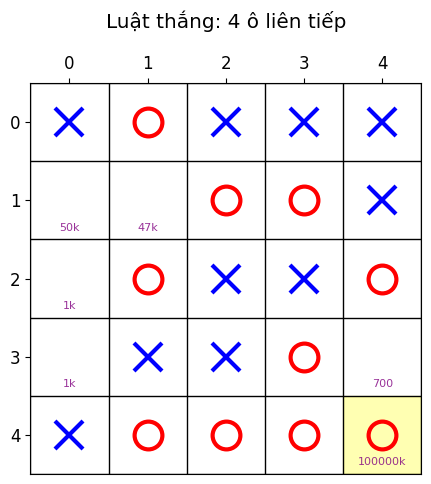


BẢNG PHÂN TÍCH (Top 3):
| Tọa độ   | Điểm số    | Đánh giá
| (np.int64(4), np.int64(4)) | 100000000  | Sắp thắng/Chặn thua
| (np.int64(1), np.int64(0)) | 50000.0    | Sắp thắng/Chặn thua
| (np.int64(1), np.int64(1)) | 47000.0    | Tạo thế công
AI chọn (np.int64(4), np.int64(4)) (Điểm: 100000000)

AI THẮNG!


In [ ]:
def run_caro_final():
    print("="*50)
    print("CARO AI ❌⭕")
    print("="*50)

    # 1. Nhập Ma trận (Kích thước)
    while True:
        try:
            print("\nNhập kích thước bàn cờ (VD: '3x3', '5x5', '10x10'):")
            raw = input(">> Kích thước: ").lower().replace(' ', '')

            if 'x' in raw:
                rows, cols = map(int, raw.split('x'))
            else:
                rows = cols = int(raw)

            if rows < 3 or cols < 3:
                print("Kích thước phải >= 3x3.")
            elif rows > 15 or cols > 15:
                print("Kích thước tối đa 15x15.")
            else:
                break
        except:
            print("Định dạng sai (VD đúng: 5x5).")

    # 2. Khởi tạo
    board = CaroBoard(rows, cols)
    ai = CaroAI(depth=2)
    CaroVisualizer.draw(board)

    print(f"\n[LUẬT CHƠI] Bạn là X (Xanh). AI là O (Vòng tròn Đỏ).")
    print(f"Điều kiện thắng: {board.win_k} ô liên tiếp.")

    while True:
        # --- HUMAN TURN ---
        while True:
            try:
                txt = input("\n[Lượt X] Nhập 'Hàng Cột' (VD: 1 1): ")
                if txt.lower() == 'q': return
                r, c = map(int, txt.split())
                if board.make_move(r, c, PLAYER_X): break
                print("Ô không hợp lệ!")
            except: pass

        CaroVisualizer.draw(board, last_move=(r,c))

        if board.check_winner() == PLAYER_X:
            print("\nBẠN THẮNG!")
            break
        if board.is_full():
            print("\nHÒA CỜ!")
            break

        # --- AI TURN ---
        print("\nAI đang suy nghĩ...")
        move, scores, logs = ai.get_best_move_explained(board)

        if move:
            board.make_move(move[0], move[1], PLAYER_O)
            CaroVisualizer.draw(board, last_move=move, ai_scores=scores)

            print(f"\nBẢNG PHÂN TÍCH (Top 3):")
            print(f"| {'Tọa độ':<8} | {'Điểm số':<10} | {'Đánh giá'}")
            for item in logs[:3]:
                print(f"| {str((item[0], item[1])):<8} | {item[2]:<10} | {item[3]}")

            print(f"AI chọn {move} (Điểm: {logs[0][2]})")

            if board.check_winner() == PLAYER_O:
                print("\nAI THẮNG!")
                break
            if board.is_full():
                print("\nHÒA CỜ!")
                break
        else:
            print("Lỗi AI.")
            break

run_caro_final()

# MODULE 3: TÔ MÀU ĐỒ THỊ (GRAPH COLORING)
## PHẦN 1: TỔNG QUAN (INTRODUCTION)

### 1.1. Đặt vấn đề

Trong khoa học máy tính và toán học ứng dụng, việc tìm kiếm lời giải tối ưu cho các hệ thống phức tạp luôn là một thách thức lớn. Một lớp bài toán quan trọng trong số đó là **Bài toán thỏa mãn ràng buộc (Constraint Satisfaction Problems - CSP)**. Khác với các bài toán tìm kiếm thông thường, CSP yêu cầu lời giải phải tuân thủ nghiêm ngặt một tập hợp các quy tắc định trước.

**Bài toán Tô màu đồ thị (Graph Coloring)** là một đại diện kinh điển của CSP. Việc giải quyết bài toán này có ý nghĩa to lớn trong thực tiễn, từ việc lập lịch biểu, phân chia tần số vô tuyến đến tối ưu hóa thanh ghi trong máy tính. Tuy nhiên, việc tìm ra số màu tối thiểu (sắc số) cho một đồ thị tổng quát thuộc lớp bài toán NP-Hard, đòi hỏi các phương pháp tiếp cận thông minh hơn là vét cạn.

### 1.2. Mục tiêu báo cáo

Báo cáo này hướng tới các mục tiêu cụ thể sau:

1.  Hệ thống hóa cơ sở lý thuyết về CSP và bài toán tô màu đồ thị.
2.  Phân tích thuật toán tô màu tối ưu sử dụng phương pháp heuristic dựa trên bậc của đỉnh (Degree-based Heuristic).
3.  Đưa ra thiết kế chi tiết để xây dựng chương trình giải quyết bài toán, bao gồm định nghĩa dữ liệu và giải thuật.

## PHẦN 2: CƠ SỞ LÝ THUYẾT (THEORETICAL BACKGROUND)

### 2.1. Lý thuyết về Bài toán Thỏa mãn ràng buộc (CSP)

**Định nghĩa:** Một bài toán CSP được xác định bởi bộ ba $(X, D, C)$:

  * **$X = \{X_1, X_2, \dots, X_n\}$**: Là tập hợp hữu hạn các biến cần tìm giá trị.
  * **$D = \{D_1, D_2, \dots, D_n\}$**: Là tập hợp các miền giá trị, trong đó mỗi biến $X_i$ nhận giá trị thuộc $D_i$.
  * **$C$**: Là tập hợp hữu hạn các ràng buộc. Ràng buộc là một quan hệ trên một tập con các biến, giới hạn các tổ hợp giá trị mà các biến đó có thể nhận đồng thời.

**Ràng buộc có thể biểu diễn bằng:**

  * Một biểu thức toán học/logic (Ví dụ: $X_i \neq X_j$).
  * Một bảng liệt kê (Table enumeration) các phép gán giá trị hợp lệ.

**Lời giải:** Một lời giải thỏa mãn ràng buộc là một phép gán đầy đủ giá trị cho tất cả các biến trong $X$ sao cho không vi phạm bất kỳ ràng buộc nào trong $C$.

### 2.2. Bài toán Tô màu đồ thị (Graph Coloring)

**Phát biểu bài toán:**
Cho một đồ thị vô hướng $G = (V, E)$, trong đó $V$ là tập đỉnh và $E$ là tập cạnh.

  * **Biến:** Mỗi đỉnh $v \in V$ là một biến.
  * **Miền giá trị:** Tập hợp các màu $K = \{1, 2, \dots, m\}$.
  * **Ràng buộc:** Hai đỉnh kề nhau không được tô cùng màu.
    $$\forall (u, v) \in E \Rightarrow Color(u) \neq Color(v)$$

**Mục tiêu tối ưu:** Tìm giá trị $m$ nhỏ nhất (gọi là Sắc số - Chromatic Number, ký hiệu $\chi(G)$) sao cho tồn tại phép gán màu hợp lệ.

**Nhận định lý thuyết:**
Do tính chất NP-Hard, thời gian tính toán lời giải chính xác tăng theo hàm mũ đối với số đỉnh. Do đó, các thuật toán Heuristic bằng phương pháp dựa trên bậc đỉnh như tô màu đồ thịthường được ưu tiên sử dụng để tìm lời giải gần tối ưu hoặc tối ưu trong thời gian đa thức.

## PHẦN 3: THUẬT TOÁN GIẢI QUYẾT (ALGORITHM)

### 3.1. Nguyên lý hoạt động

Thuật toán dựa trên nhận định: *Đỉnh có bậc càng cao thì càng khó tô màu do bị ràng buộc bởi nhiều láng giềng. Cần ưu tiên giải quyết đỉnh này sớm nhất.* Sau khi tô màu xong, đỉnh đó coi như "đã được giải quyết", do đó ta có thể "loại bỏ" nó khỏi đồ thị xét duyệt bằng cách hạ bậc các đỉnh lân cận.

### 3.2. Các bước của thuật toán

Quy trình lặp lại cho đến khi tất cả các đỉnh đều được tô màu:

  * **Bước 1: Lựa chọn đỉnh (Selection)**

      * Trong số các đỉnh chưa được tô màu, chọn đỉnh $v$ có **bậc hiện tại lớn nhất**.
      * Nếu có nhiều đỉnh có cùng bậc lớn nhất, chọn đỉnh có chỉ số nhỏ nhất (hoặc ngẫu nhiên).
      * Gán cho đỉnh $v$ một màu $i$ nhỏ nhất có thể trong tập màu, sao cho màu $i$ không trùng với màu của bất kỳ đỉnh lân cận nào đã được tô trước đó (không nằm trong danh sách cấm).

  * **Bước 2: Hạ bậc (Degree Reduction)**

      * Đánh dấu đỉnh $v$ là **Đã tô màu** (Gán bậc của $v = 0$ hoặc loại khỏi danh sách xét).
      * Với mọi đỉnh $u$ kề với $v$ và chưa được tô màu: Thực hiện giảm bậc của $u$ đi 1 ($Degree[u] := Degree[u] - 1$).
      * *Ý nghĩa:* Việc giảm bậc phản ánh rằng đỉnh $u$ giờ đây có ít hơn một "láng giềng chưa được giải quyết", thay đổi độ ưu tiên của $u$ trong các bước lặp sau.

  * **Bước 3: Lan truyền ràng buộc (Constraint Propagation)**

      * Cập nhật thông tin cho các đỉnh lân cận: Đánh dấu màu $i$ (màu vừa tô cho $v$) là "Cấm" đối với các đỉnh $u$ kề $v$.
      * Khi đến lượt tô màu đỉnh $u$, thuật toán sẽ bỏ qua các màu bị cấm này.


HELPER (CẤU TRÚC & HIỂN THỊ)

GraphData: Quản lý đỉnh, cạnh.

GraphVisualizer: Vẽ đồ thị bằng thư viện networkx.

In [ ]:
class GraphCSP:
    """Quản lý dữ liệu đồ thị."""
    def __init__(self, num_vertices):
        self.n = num_vertices
        self.adj = {i: [] for i in range(num_vertices)}
        self.edges = []
        self.degrees = {}

    def add_constraint(self, u, v):
        if u != v and v not in self.adj[u]:
            self.adj[u].append(v)
            self.adj[v].append(u)
            self.edges.append((u, v))

    def generate_random_constraints(self, prob=0.4):
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if random.random() < prob:
                    self.add_constraint(i, j)
        # Lưu bậc của đỉnh để dùng cho Heuristic
        self.degrees = {i: len(self.adj[i]) for i in range(self.n)}

    def get_sorted_nodes(self):
        """Sắp xếp đỉnh theo bậc giảm dần."""
        return sorted(self.degrees.keys(), key=lambda x: self.degrees[x], reverse=True)

class CSPVisualizer:
    """Hiển thị đồ thị và Bảng logic chi tiết."""

    @staticmethod
    def show_step_with_logic_table(step, graph, current_node, assignment, table_data, max_colors):
        """
        Vẽ đồ thị và Bảng logic: Đỉnh -> Bậc -> Cấm -> Chọn.
        """
        # 1. SETUP ĐỒ THỊ
        G = nx.Graph()
        G.add_nodes_from(range(graph.n))
        G.add_edges_from(graph.edges)
        pos = nx.spring_layout(G, seed=99)

        cmap = plt.cm.tab20 # Bảng màu

        node_colors = []
        node_sizes = []
        edge_colors = []
        node_labels = {}

        for i in range(graph.n):
            node_labels[i] = str(i)
            if i == current_node:
                # Đỉnh đang xét: Vàng viền Đỏ
                node_colors.append('yellow')
                node_sizes.append(900)
                edge_colors.append('red')
            elif i in assignment:
                # Đỉnh đã tô
                color_idx = assignment[i]
                if color_idx == -1:
                    node_colors.append('black') # Fail
                else:
                    node_colors.append(cmap(color_idx % 20))
                node_sizes.append(700)
                edge_colors.append('black')
            else:
                # Chưa tô
                node_colors.append('lightgray')
                node_sizes.append(700)
                edge_colors.append('gray')

        # 2. VẼ SUBPLOTS (Trái: Graph, Phải: Table)
        fig, (ax_graph, ax_table) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

        # --- VẼ GRAPH ---
        nx.draw_networkx_nodes(G, pos, ax=ax_graph, node_color=node_colors, node_size=node_sizes, edgecolors=edge_colors, linewidths=2)
        nx.draw_networkx_edges(G, pos, ax=ax_graph, edge_color='gray', alpha=0.5)
        nx.draw_networkx_labels(G, pos, labels=node_labels, ax=ax_graph, font_weight='bold')

        title_info = f"Đang xét Đỉnh {current_node}" if current_node is not None else "Hoàn tất"
        ax_graph.set_title(f"BƯỚC {step}: {title_info}", fontsize=12, fontweight='bold')
        ax_graph.axis('off')

        # Legend màu
        patches = []
        unique_colors = sorted(list(set(val for val in assignment.values() if val != -1)))
        for c in unique_colors:
            patches.append(mpatches.Patch(color=cmap(c%20), label=f'Màu {c}'))
        if -1 in assignment.values():
            patches.append(mpatches.Patch(color='black', label='Lỗi'))

        if patches:
            ax_graph.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15), fontsize=9)

        # --- VẼ BẢNG LOGIC ---
        ax_table.axis('off')
        ax_table.set_title(f"BẢNG PHÂN TÍCH CHỌN MÀU (Max: {max_colors})", fontweight='bold', pad=10)

        # Định nghĩa cột theo đúng yêu cầu
        col_labels = ["Bước", "Đỉnh", "Bậc", "Màu Bị Cấm (Hàng xóm)", "Màu Được Tô"]

        if table_data:
            # Hiển thị tối đa 16 dòng cuối
            visible_data = table_data[-16:]

            table = ax_table.table(cellText=visible_data, colLabels=col_labels,
                                   loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

            table.auto_set_font_size(False)
            table.set_fontsize(9)

            # Format bảng đẹp hơn
            for (row, col), cell in table.get_celld().items():
                if row == 0: # Header
                    cell.set_facecolor('#404040')
                    cell.set_text_props(weight='bold', color='white')
                elif row == len(visible_data): # Dòng mới nhất (đang xét)
                    cell.set_facecolor('#fffacd') # Vàng nhạt
                    cell.set_text_props(weight='bold')

                if col == 3:
                    cell.set_text_props(size=8)

        else:
            ax_table.text(0.5, 0.5, "Đang khởi tạo...", ha='center')

        plt.tight_layout()
        plt.show()

CORE (THUẬT TOÁN GREEDY)

In [ ]:
class CSPSolverLogic:
    def __init__(self, graph):
        self.graph = graph

    def suggest_min_colors(self):
        """Gợi ý số màu."""
        nodes = self.graph.get_sorted_nodes()
        temp_asn = {}
        for u in nodes:
            forbidden = {temp_asn[v] for v in self.graph.adj[u] if v in temp_asn}
            c = 0
            while c in forbidden: c += 1
            temp_asn[u] = c
        return max(temp_asn.values()) + 1

    def solve_process(self, limit_colors):
        """Generator: Trả về dữ liệu bảng logic từng bước."""

        # 1. Sắp xếp biến (Heuristic Bậc)
        # Đây là cột "Bậc" trong bảng
        sorted_nodes = self.graph.get_sorted_nodes()

        assignment = {}
        table_history = []
        # Cấu trúc row: [Bước, Đỉnh, Bậc, Màu Cấm, Màu Chọn]

        step = 0

        for u in sorted_nodes:
            step += 1

            # Yield trạng thái TRƯỚC khi quyết định (để hiện dòng đang xét)
            yield step, u, assignment, table_history

            # 2. Tìm ràng buộc (Màu bị cấm)
            degree_u = self.graph.degrees[u]
            forbidden_colors = set()

            for v in self.graph.adj[u]:
                if v in assignment and assignment[v] != -1:
                    forbidden_colors.add(assignment[v])

            # Format string cho đẹp: "{0, 2}"
            forbidden_str = str(sorted(list(forbidden_colors))).replace('[', '{').replace(']', '}')
            if not forbidden_colors: forbidden_str = "∅" # Rỗng

            # 3. Chọn màu
            chosen_color = -1
            for c in range(limit_colors):
                if c not in forbidden_colors:
                    chosen_color = c
                    break

            assignment[u] = chosen_color

            # Kết quả hiển thị
            res_str = f"Màu {chosen_color}" if chosen_color != -1 else "FAIL"

            # Thêm vào lịch sử bảng
            table_history.append([
                step,
                f"Đỉnh {u}",
                degree_u,
                forbidden_str,
                res_str
            ])
        yield step + 1, None, assignment, table_history

Code: Main(CSP)

TÔ MÀU ĐỒ THỊ
1. Nhập số đỉnh: 12

GỢI Ý: Đồ thị này cần tối thiểu 4 màu.
2. Bạn muốn dùng bao nhiêu màu? (Nhập 4 để vừa đủ): 4

Đang chạy mô phỏng với 4 màu...



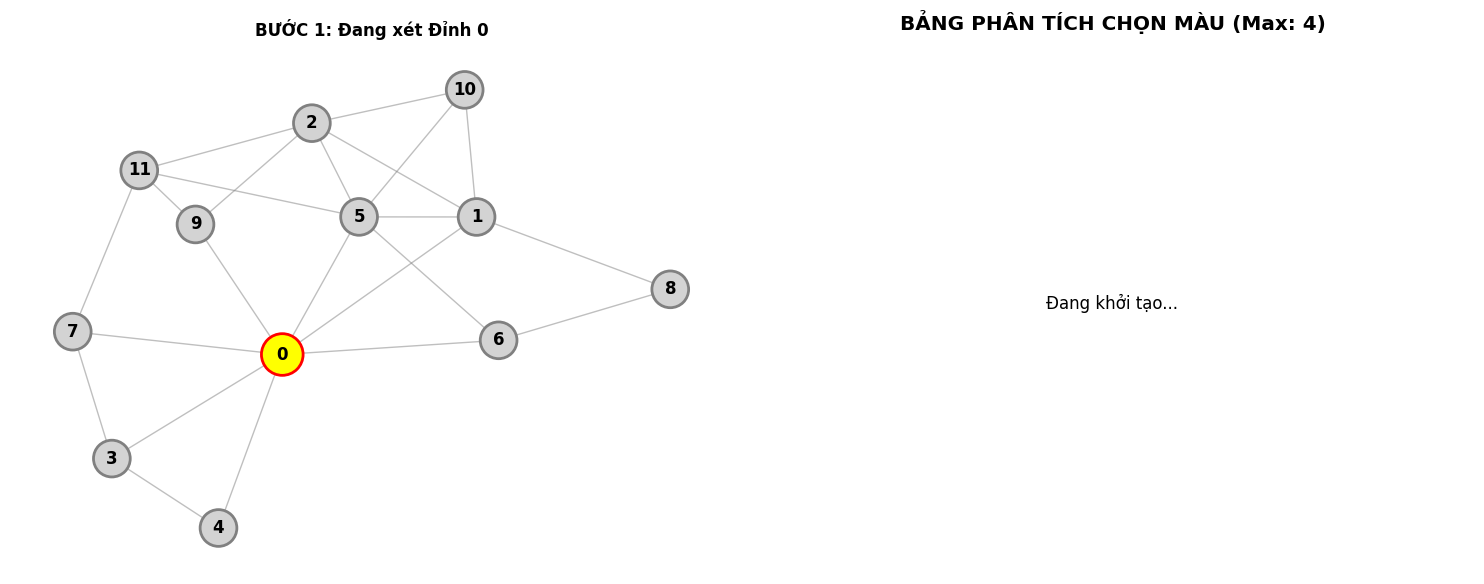

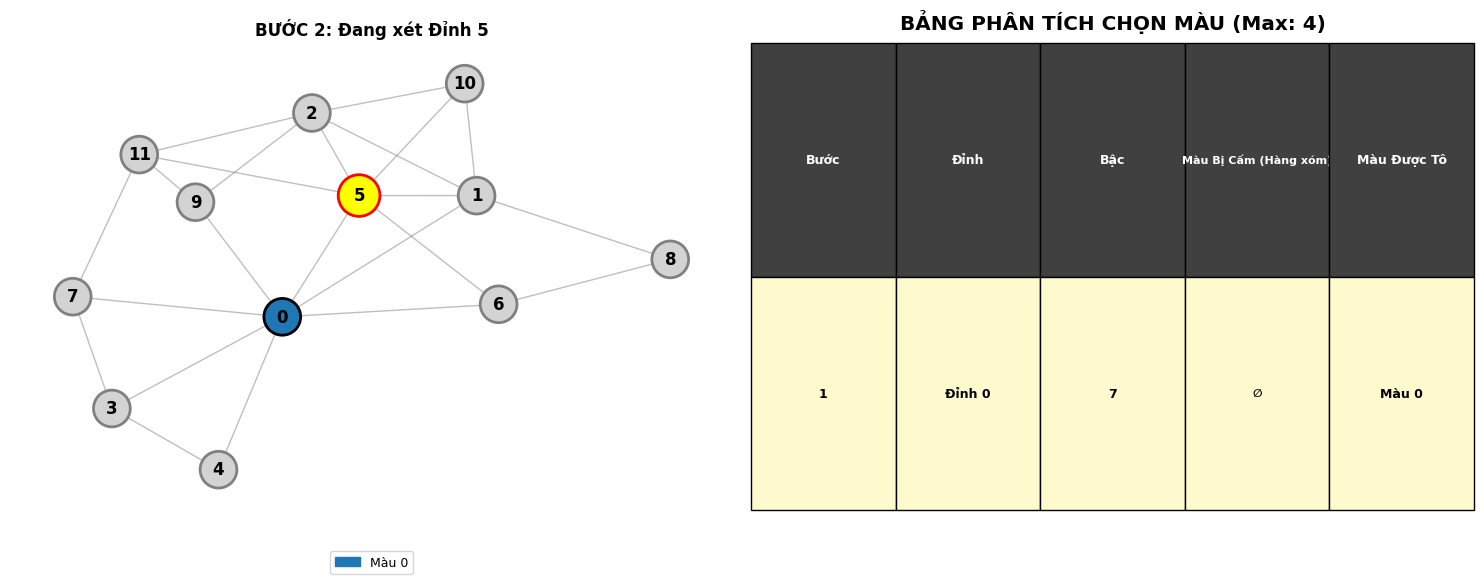

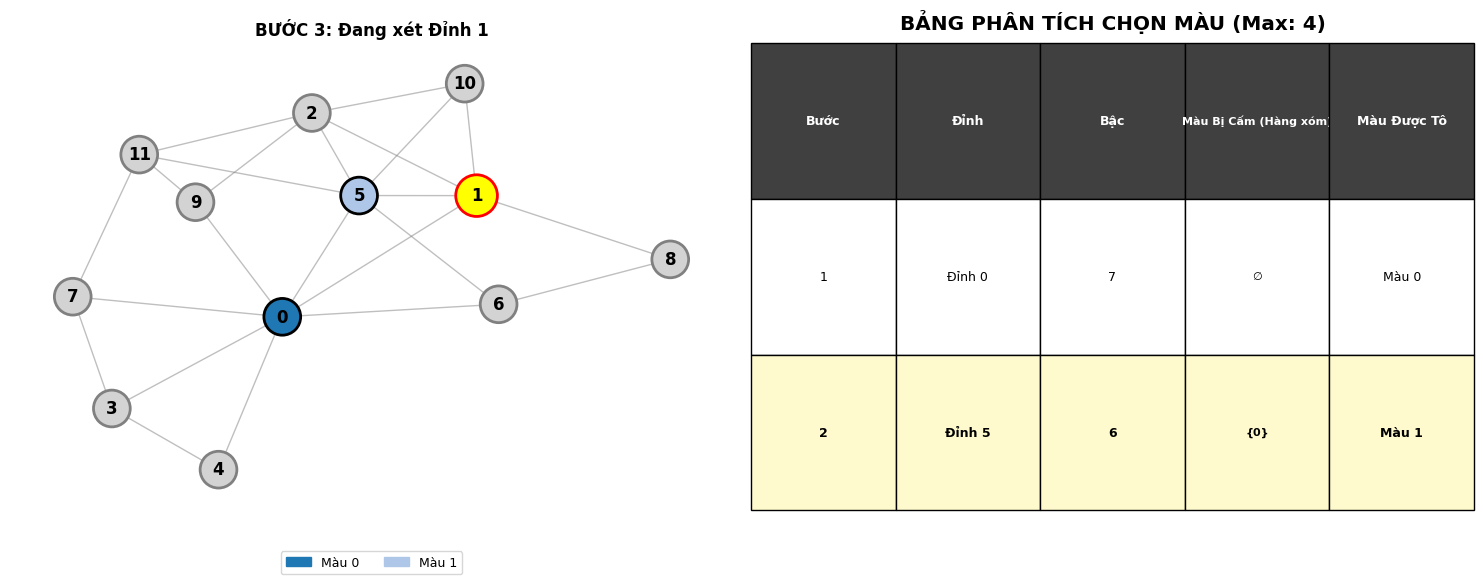

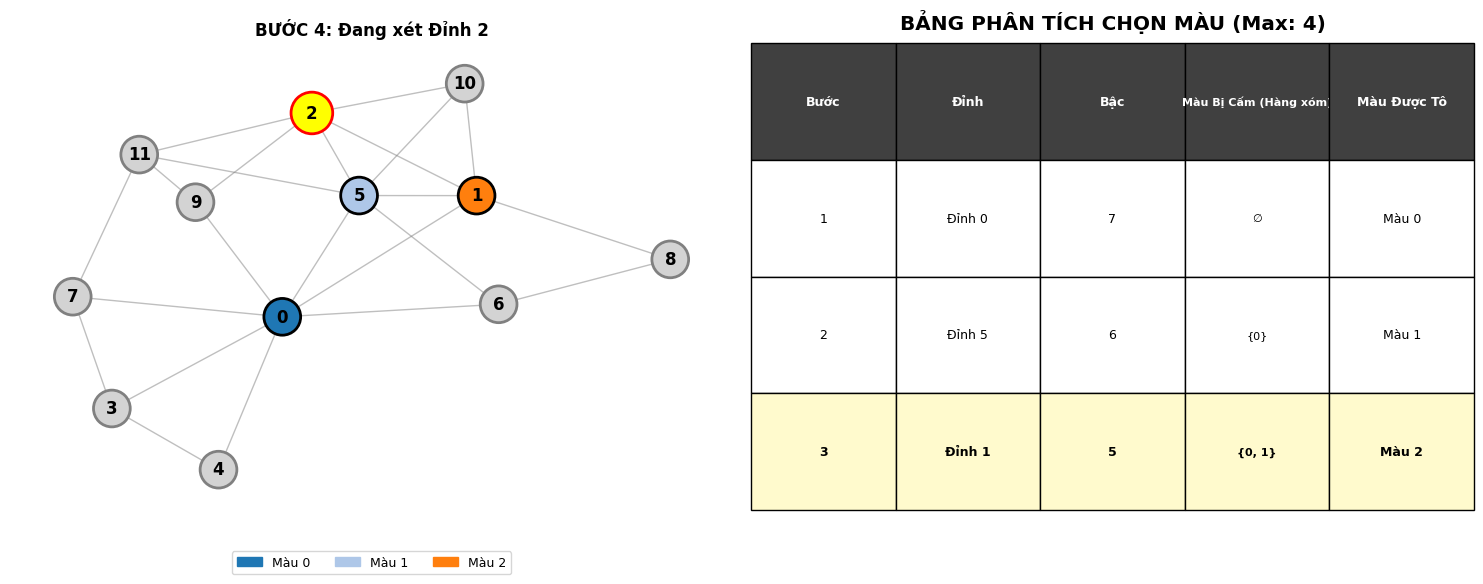

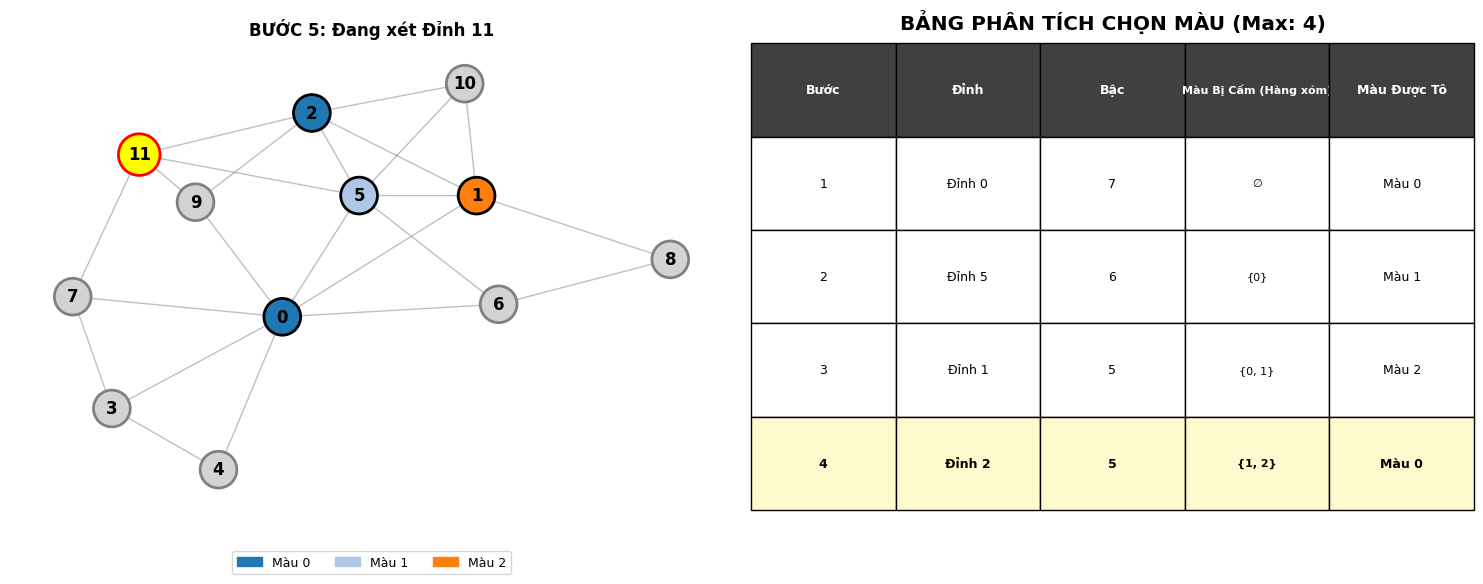

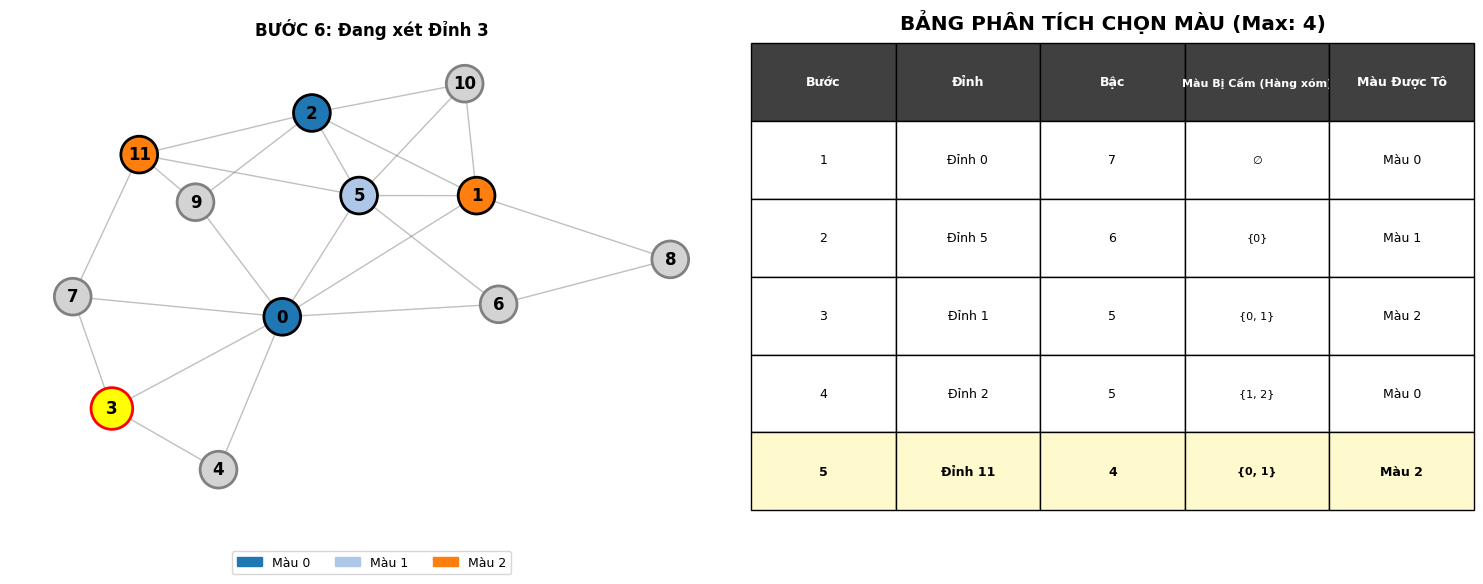

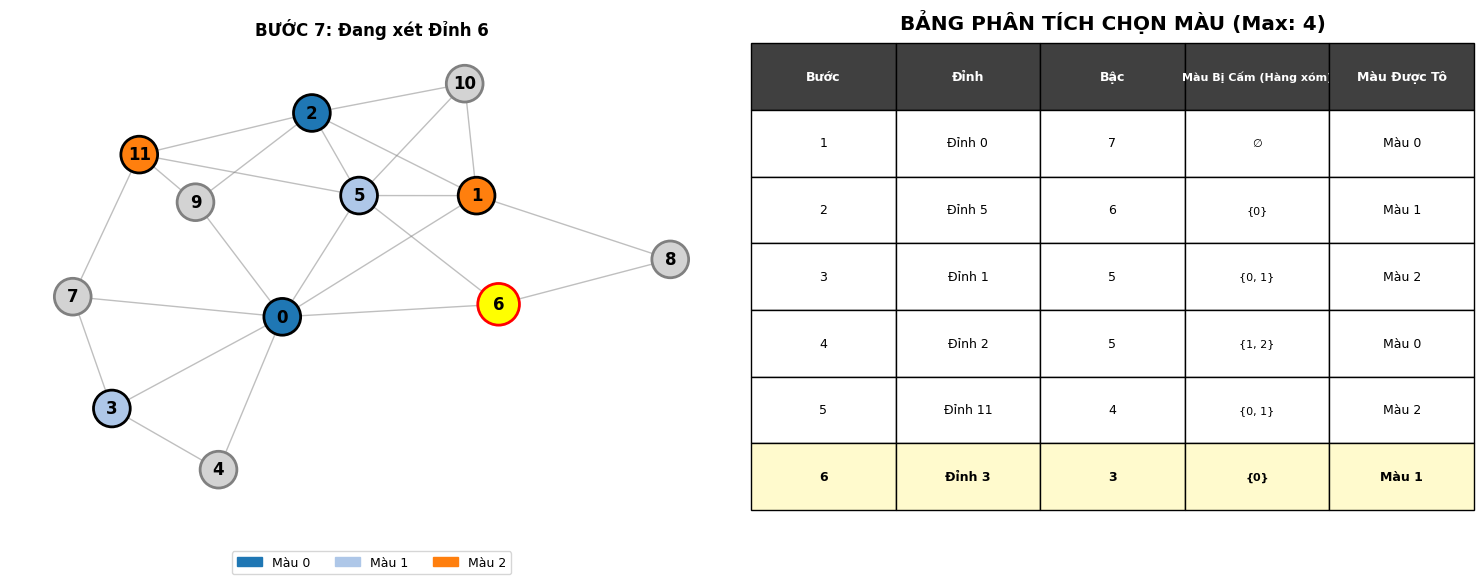

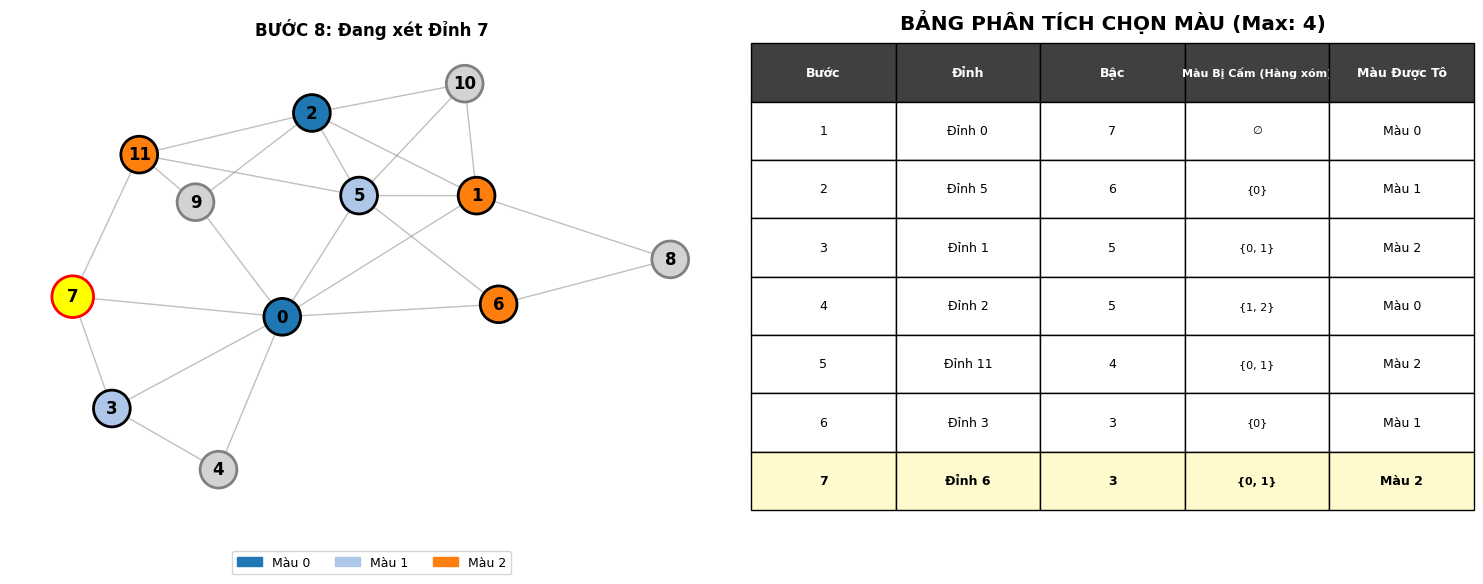

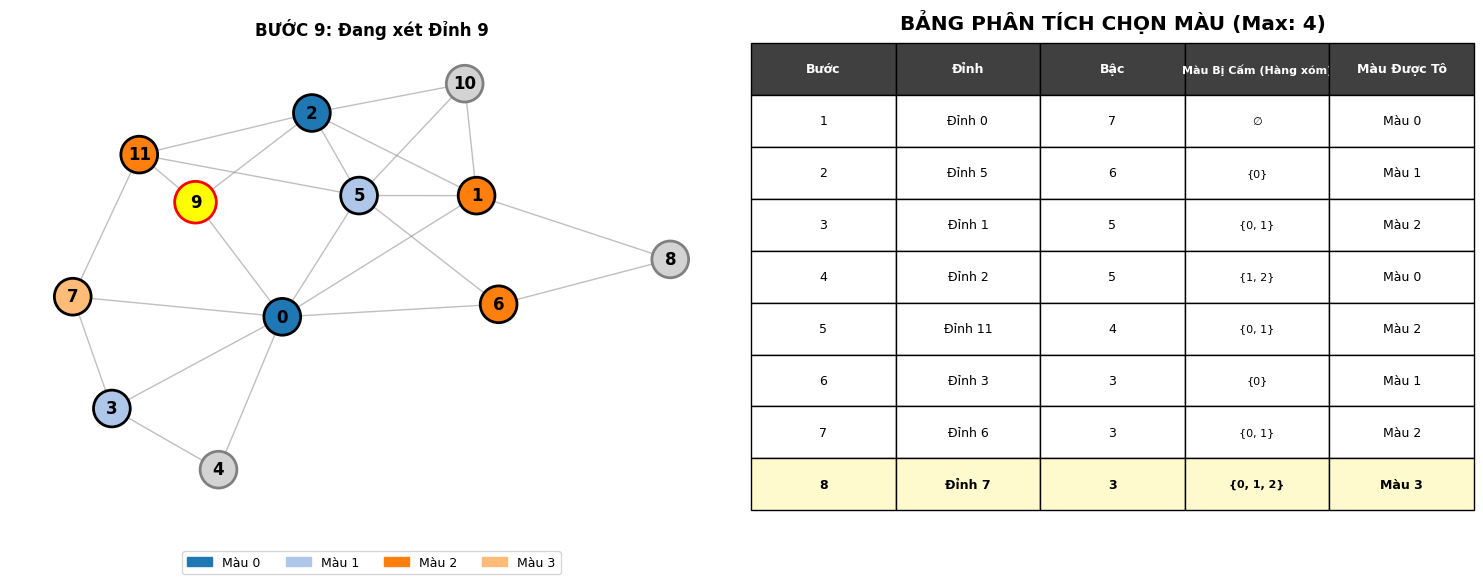

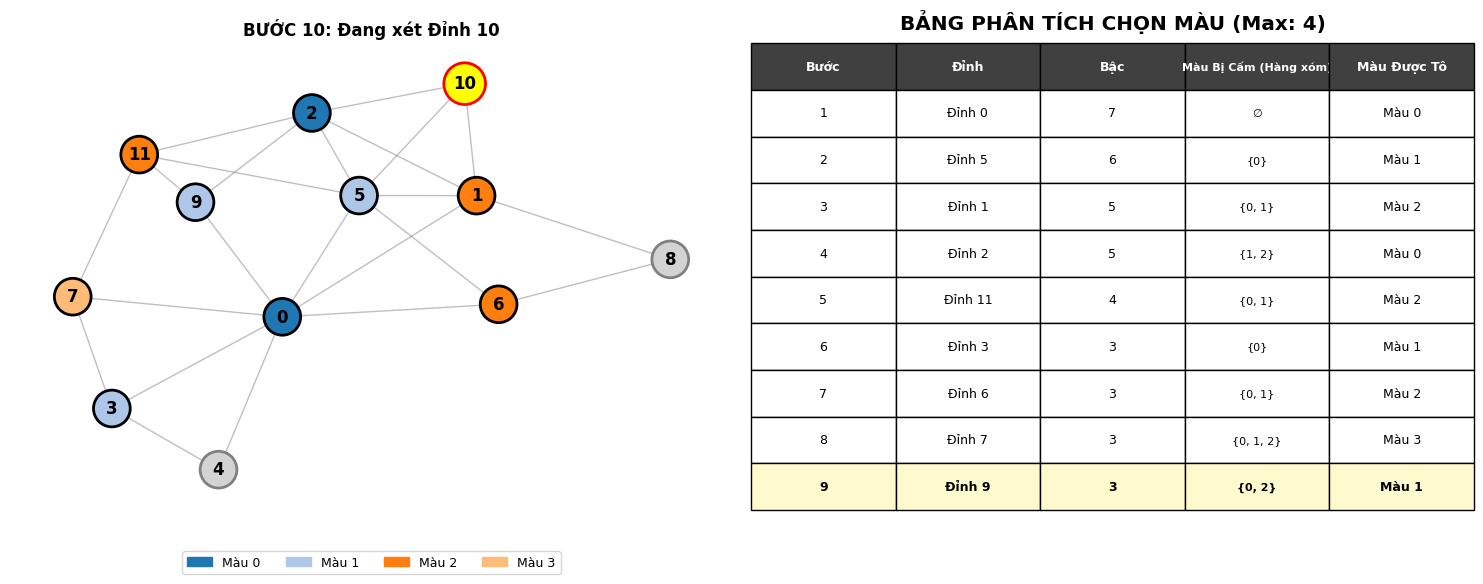

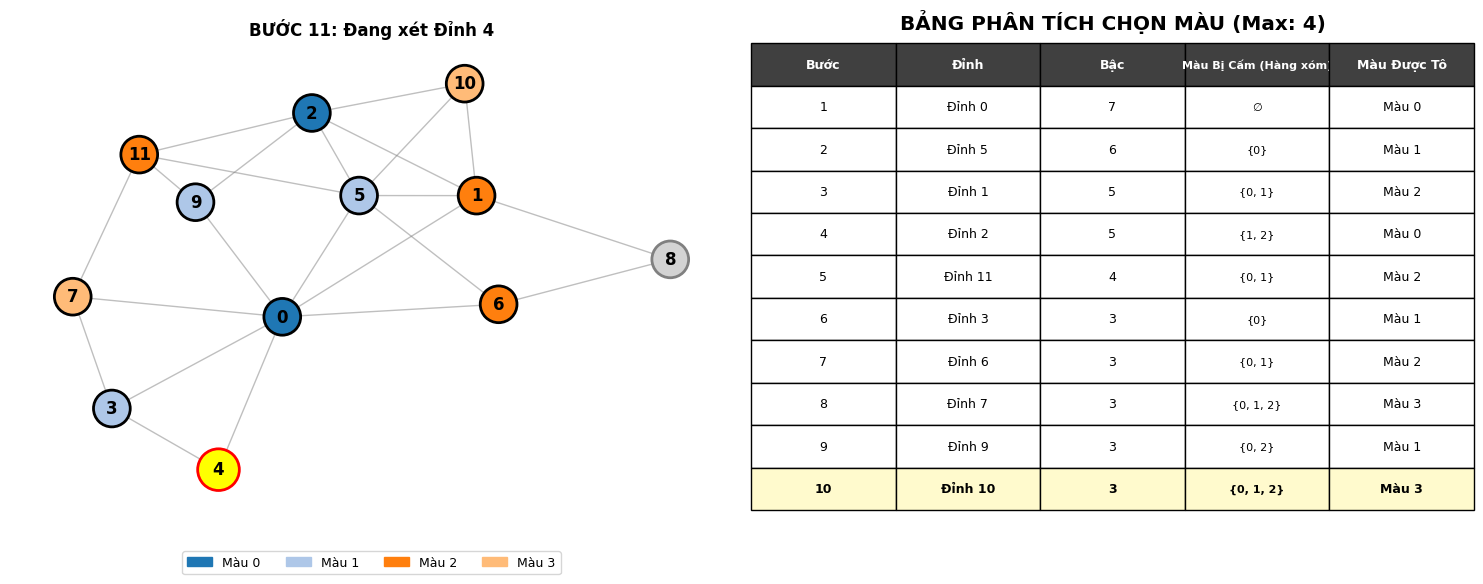

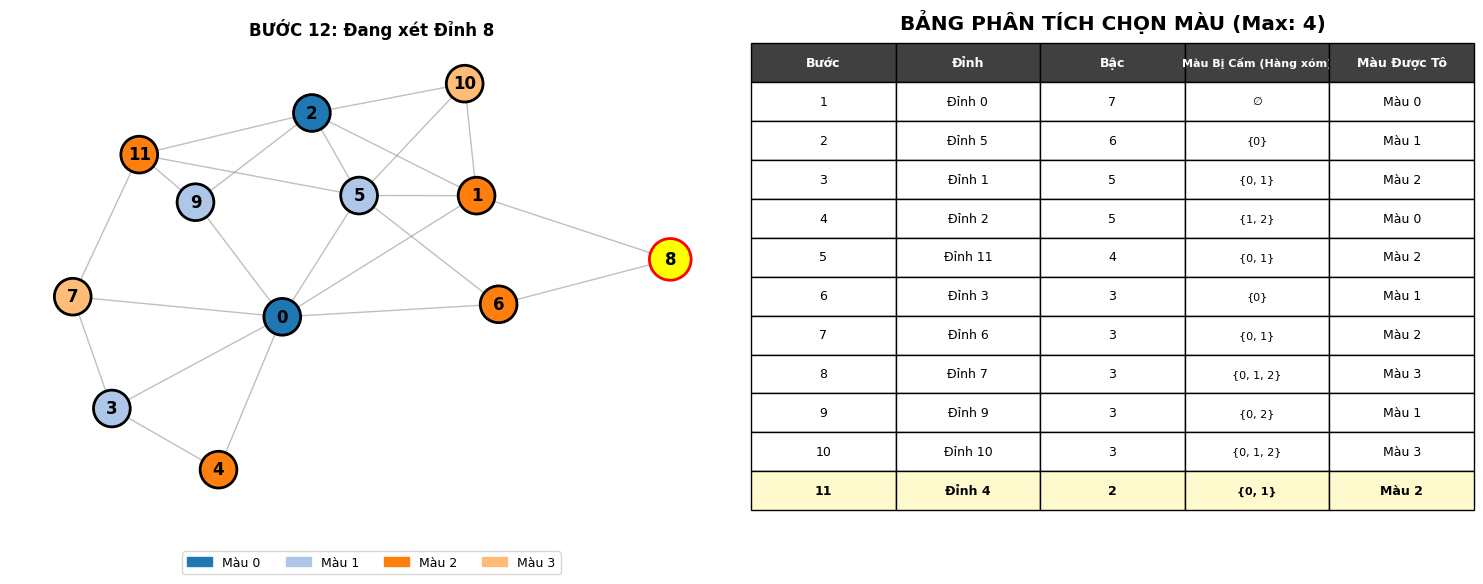

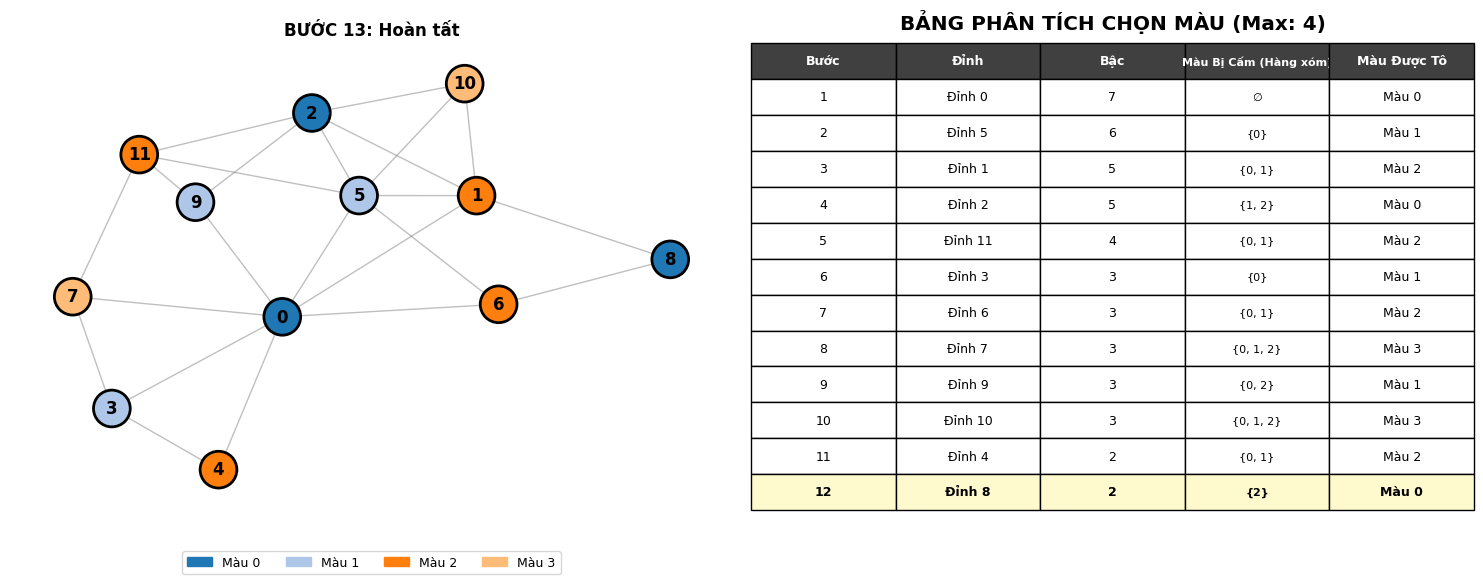


Hoàn tất quá trình tô màu.


In [ ]:
def run_csp():
    print("="*60)
    print("TÔ MÀU ĐỒ THỊ")
    print("="*60)

    # 1. Input
    while True:
        try:
            n = int(input("1. Nhập số đỉnh: "))
            if 3 <= n <= 25: break
            print("Nhập từ 3-25.")
        except: pass

    # 2. Tạo đồ thị
    graph = GraphCSP(n)
    graph.generate_random_constraints(prob=0.3)

    # 3. Gợi ý
    solver = CSPSolverLogic(graph)
    min_k = solver.suggest_min_colors()
    print(f"\nGỢI Ý: Đồ thị này cần tối thiểu {min_k} màu.")

    while True:
        try:
            user_k = int(input(f"2. Bạn muốn dùng bao nhiêu màu? (Nhập {min_k} để vừa đủ): "))
            if user_k >= 1: break
        except: pass

    print(f"\nĐang chạy mô phỏng với {user_k} màu...\n")

    # 4. Loop vẽ
    prev_step = -1
    for step, curr, assign, history in solver.solve_process(limit_colors=user_k):
        if step != prev_step:
            CSPVisualizer.show_step_with_logic_table(step, graph, curr, assign, history, user_k)
            prev_step = step

    print("\nHoàn tất quá trình tô màu.")

# Chạy
run_csp()